In [30]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

%matplotlib inline

# Read and Display Face Images

In [27]:
images = []
for filename in os.listdir('../data/group10/'):
    image = cv2.imread(f'../data/group10/{filename}', cv2.IMREAD_GRAYSCALE)
    images.append(image)

print(f'There are {len(images)} images to reconstruct')

There are 30 images to reconstruct


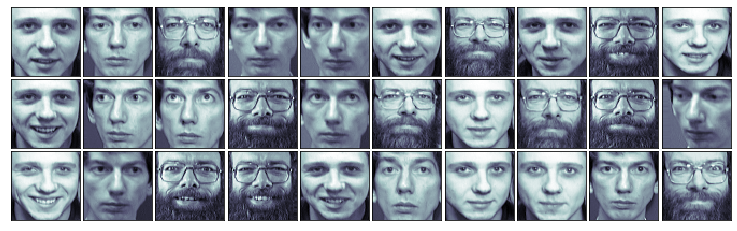

In [29]:
#Setup a figure 10 inches by 10 inches 
fig = plt.figure(figsize=(10,10)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 

# Plot the faces, each image is 64 by 64 pixels 
for i in range(len(images)): 
    ax = fig.add_subplot(10, 10, i+1, xticks=[], yticks=[]) 
    ax.imshow(images[i], cmap=plt.cm.bone, interpolation='nearest') 

plt.show() 

# PCA on Faces

In [42]:
X = np.array(images)
X = X.reshape(-1, 64**2)
print('Input dataset has shape ', X.shape)

Input dataset has shape  (30, 4096)


In [61]:
pca = PCA(n_components=3)
X_red = pca.fit_transform(X)
print('Reduced dimensions of input data after PCA is ', X_red.shape)

Reduced dimensions of input data after PCA is  (30, 3)


# Reconstruct Images through Inverse Transform and Visualize

In [62]:
#Inverse transform and visualize
X_inv = pca.inverse_transform(X_red)
X_inv = X_inv.reshape(-1, 64, 64)
print('Reconstructed input data to shape ', X_inv.shape)

Reconstructed input data to shape  (30, 64, 64)


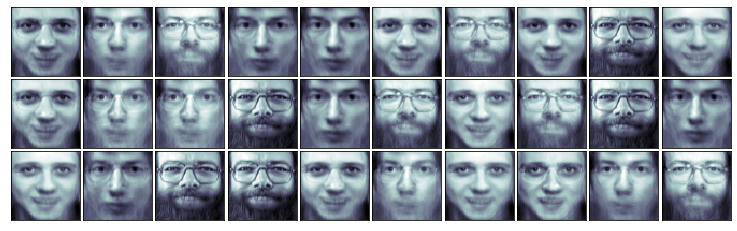

In [63]:
#Setup a figure 10 inches by 10 inches 
fig = plt.figure(figsize=(10,10)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 

# Plot the faces, each image is 64 by 64 pixels 
for i in range(len(images)): 
    ax = fig.add_subplot(10, 10, i+1, xticks=[], yticks=[]) 
    ax.imshow(X_inv[i], cmap=plt.cm.bone, interpolation='nearest') 

plt.show() 